# Avaliação

## Métricas de erro

* Matriz de confusão 
<img src='https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png'>


Para simplificar, uma casse é denominada positiva e a outra negativa.

* VP: corresponde ao número de verdadeiros positivos, ou seja, o número de exemplos da classe positiva que foram classificados corretamente
* VN: corresponde ao número de verdadeiros negativos, ou seja, o número de exemplos da classe negativa que foram classificados corretamente
* FP: corresponde ao número de falsos positivos, ou seja, o numero de exemplos cuja classe verdadeira é negativa mas que foram classificados como pertencentes a classe positiva
* FN: corresponde ao número de falsos negativos, ou seja, o numero de exemplos cuja classe verdadeira é positiva mas que foram classificados como pertencentes a classe negativa

In [1]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [2]:
#dataset 1 - balanceado; não linearmente separavel, sem outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(25, 2.5, size=(100, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(22, 2.5, size=(100, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample = pd.concat([classe_1, classe_2])
sample.head()

,feature_1,feature_2,classe
0,27.229559,24.117793,0
1,23.632428,25.376754,0
2,25.721884,25.044150,0
3,26.021600,24.632004,0
4,25.095533,23.880347,0


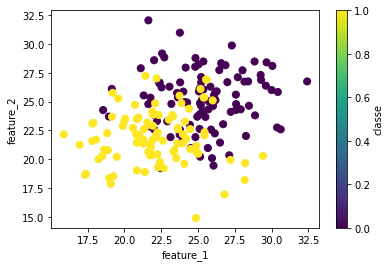

In [3]:
fig, ax = plt.subplots()
sample.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [4]:
X = sample[['feature_1', 'feature_2']]
y = sample['classe']

## Acurácia

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)
clf = SVC(kernel='rbf', C=1, random_state=42, probability=True)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (acc.mean()*100, acc.std()*100))

80.00% accuracy with a standard deviation of 0.00%


Calculada pela soma dos valores da diagonal principal da matriz, dividida pelo total de elementos da matriz

$$
  Acc=  \frac{VP+VN}{n}
$$



## Precisão 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
precision =   precision_score(y_test, y_pred, average='micro')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (acc.mean()*100, acc.std()*100))
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (precision.mean()*100, precision.std()*100))

80.00% accuracy with a standard deviation of 0.00%
80.00% accuracy with a standard deviation of 0.00%


Proporção de exemplos positivos classificados corretamente entre todos aqueles preditos como positivos

$$
  prec=  \frac{VP}{VP+FP}
$$

Quando FP são mais prejudiciais otimizar por essa metrica

## Sensibilidade (Recall)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
precision =   precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred)
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (acc.mean()*100, acc.std()*100))
print("%0.2f%% precision with a standard deviation of %0.2f%%" % (precision.mean()*100, precision.std()*100))
print("%0.2f%% recall with a standard deviation of %0.2f%%" % (recall.mean()*100, recall.std()*100))

80.00% accuracy with a standard deviation of 0.00%
80.00% precision with a standard deviation of 0.00%
82.35% recall with a standard deviation of 0.00%


Corresponde a taxa de acertos na classe positiva (TVP)

$$
  recall=  \frac{VP}{VP+FN}
$$

QUando FN são mais prejudiciais otimizar por essa metrica

## Especificidade

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
precision =   precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred)
# esp = nao tem uma lib 
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (acc.mean()*100, acc.std()*100))
print("%0.2f%% precision with a standard deviation of %0.2f%%" % (precision.mean()*100, precision.std()*100))
print("%0.2f%% recall with a standard deviation of %0.2f%%" % (recall.mean()*100, recall.std()*100))

80.00% accuracy with a standard deviation of 0.00%
80.00% precision with a standard deviation of 0.00%
82.35% recall with a standard deviation of 0.00%


Corresponde ao recall da classe negativa 

$$
  esp=  \frac{VN}{VN+FP}
$$

## Limiares 

PR AUC:  0.8321978265374657
ROC AUC:  81.10859728506787
[[0.33333333 0.1       ]
 [0.11666667 0.45      ]]


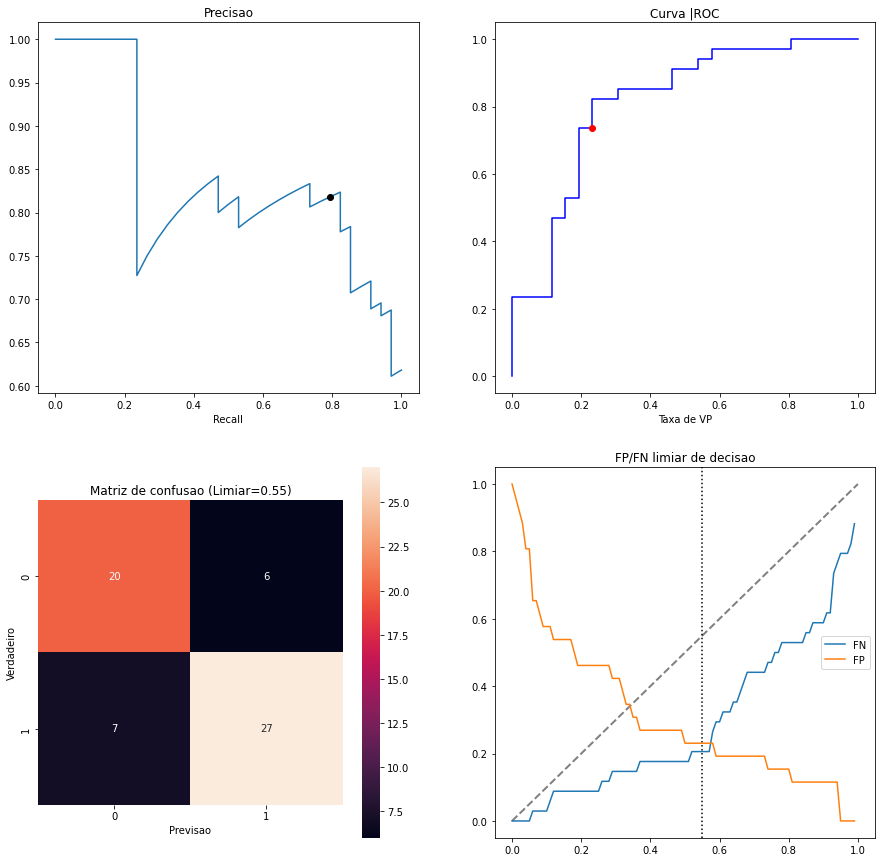

In [9]:
from sklearn.metrics import confusion_matrix

limiar = 0.55
y_pred_proba = clf.predict_proba(X_test)[:,1]
lw= 2

fig, axes = plt.subplots(ncols=2,  nrows = 2, figsize=(15, 15))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
loc =  np.argmin(np.abs(thresholds-limiar))
print('PR AUC: ', auc(recall, precision))
axes[0,0].plot(recall, precision)
axes[0,0].plot(recall[loc], precision[loc], 'ko')
axes[0,0].set_title('Curva de precisao recall')
axes[0,0].set_xlabel('Recall')
axes[0,0].set_title('Precisao')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
loc = np.argmin(np.abs(thresholds-limiar))
print('ROC AUC: ', auc(fpr, tpr)*100)
axes[0,1].plot(fpr, tpr, color='blue', label='ROC')
axes[0,1].plot(fpr[loc], tpr[loc], color='red',marker= 'o',  label='ROC')
plt.plot([0,1], [0, 1], color='grey', lw=lw, linestyle = '--')
axes[0,1].set_title('Taxa de FP')
axes[0,1].set_xlabel('Taxa de VP')
axes[0,1].set_title('Curva |ROC')



cm = confusion_matrix(y_test, (y_pred_proba>=limiar))
print(cm/np.sum(cm))

sns.heatmap(cm, vmax=np.max(cm), vmin=np.min(cm), annot=True, square=True, fmt='g', ax=axes[1,0])
axes[1,0].set_title('Matriz de confusao (Limiar={})'.format(limiar))
axes[1,0].set_xlabel('Previsao')
axes[1,0].set_ylabel('Verdadeiro')

lista_fn = []
lista_fp = []
x = []

for i in np.arange(0,1, 0.01):
    cm =confusion_matrix(y_test, (y_pred_proba>=i))
    lista_fn.append(cm[1,0]/(cm[1,0]+cm[1,1]))
    lista_fp.append(cm[0,1]/(cm[0,1]+cm[0,0]))
    x.append(i)

axes[1,1].axvline(limiar, color='k', linestyle=':')
axes[1,1].plot(x, lista_fn, label='FN')
axes[1,1].plot(x, lista_fp, label='FP')
axes[1,1].set_title('FP/FN limiar de decisao')
axes[1,1].legend()

## ROC 

0.8110859728506787


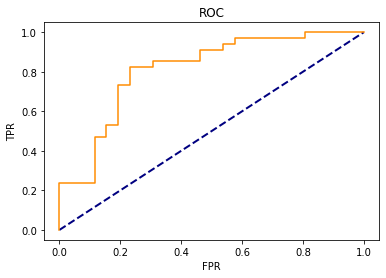

In [10]:

plt.figure()
lw= 2
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, drop_intermediate=False)
auc_roc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1], [0, 1], color='navy', lw=lw, linestyle = '--')
plt.plot(fpr, tpr, label='ROC curve area = %0.2f)' %auc_roc, color='darkorange')
print(auc_roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

plt.show()

* A linha diagonal representa classificadores que realizam predições aleatórias
* Qualquer classificador abaixo dessa linha é pior que o aleatório
* A curva é construída variando os limiares de corte de TVP e de TFP
* Objetivo: estabelecer ou criar notas de corte 

Para construir a Curva ROC é preciso:

* elencar os dados em ordem decrescente da probabilidade estimada pelo modelo;
* calcular a taxa de verdadeiro positivo (será o eixo y da curva) e a taxa de falso positivo (que será o eixo x da curva) para cada linha (sempre considerando de forma cumulativa). Neste passo considera-se a probabilidade estimada da linha como sendo o threshold.
* criar o gráfico com a taxa de verdadeiro positivo no eixo Y e a taxa de falso positivo no eixo X.

In [11]:
thresholds

array([1.99794879, 0.99794879, 0.99476671, 0.9940403 , 0.99138647,
       0.98954644, 0.98612577, 0.97296993, 0.94472341, 0.94366516,
       0.94240473, 0.94018299, 0.93785519, 0.92951007, 0.92607888,
       0.92306868, 0.92162162, 0.9096504 , 0.86335939, 0.84117466,
       0.80901218, 0.77159688, 0.75375544, 0.73855227, 0.73353359,
       0.67974055, 0.66338449, 0.65120965, 0.63235278, 0.60777332,
       0.58354795, 0.58099449, 0.57556089, 0.57339532, 0.51244939,
       0.49374453, 0.36721333, 0.36039819, 0.34346405, 0.32857118,
       0.31581631, 0.28297976, 0.28211972, 0.25464833, 0.18859027,
       0.17095835, 0.11658676, 0.11140397, 0.10548027, 0.08151819,
       0.07170504, 0.05917628, 0.05886138, 0.0549951 , 0.05318951,
       0.05269854, 0.03976213, 0.03474881, 0.0298926 , 0.01172514,
       0.00206014])

In [12]:
# pd.DataFrame(fpr)
# pd.DataFrame(tpr)
# pd.DataFrame(y_pred_proba)
# test = pd.DataFrame(y_test).reset_index()

# pd.concat([pd.DataFrame(fpr, columns=['FPR']),pd.DataFrame(tpr, columns=['TPR']), pd.DataFrame(y_pred_proba, columns=['pred_proba']), pd.DataFrame(y_pred).reset_index(), test], axis=1)


In [13]:
y_pred_df = pd.DataFrame(y_pred_proba, index=X_test.index, columns=['pred'])
y_pred_df.head()

,pred
26,0.573395
4,0.841175
99,0.058861
92,0.943665
11,0.972970


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

In [15]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.77      0.77        26
     class 1       0.82      0.82      0.82        34

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



## Referências

https://www.youtube.com/watch?v=4jRBRDbJemM